### This notebook is to select final features

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

import lightgbm as lgb

import xgboost as xgb
from xgboost import XGBRegressor

import catboost as cat
from catboost import CatBoostRegressor, cv, Pool


from feature_engine.categorical_encoders import CountFrequencyCategoricalEncoder
from feature_engine.outlier_removers import Winsorizer

# for Q-Q plots
import scipy.stats as stats

pd.set_option('display.max_rows',999)
pd.set_option('display.max_columns',50)

import warnings
warnings.filterwarnings("ignore")

In [2]:
trainset = pd.read_csv('train.csv')

In [3]:
trainset.shape

(1562, 40)

In [4]:
trainset.head()

,population,renter_occupied_households,pct_renter_occupied,evictions,rent_burden,pct_white,pct_af_am,pct_hispanic,pct_am_ind,pct_asian,pct_nh_pi,pct_multiple,pct_other,poverty_rate,pct_civilian_labor,pct_unemployment,pct_uninsured_adults,pct_uninsured_children,pct_adult_obesity,pct_adult_smoking,pct_diabetes,pct_low_birthweight,pct_excessive_drinking,pct_physical_inactivity,air_pollution_particulate_matter_value,homicides_per_100k,motor_vehicle_crash_deaths_per_100k,heart_disease_mortality_per_100k,pop_per_dentist,pop_per_primary_care_physician,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k,gross_rent
0,0.001941,0.001579,0.242055,0.252823,0.000000,0.964701,0.024333,0.044440,0.086994,0.114425,0.0,0.072748,0.000000,0.000000,0.876319,0.000000,0.000000,0.175573,0.570623,0.221111,0.386667,0.382389,1.000000,0.887858,0.451450,0.458654,0.427851,0.129032,0.336192,0.309585,0.189833,0.371681,0.621429,0.112747,0.462692,0.977995,0.335839,0.275400,0.440456,577
1,0.015230,0.013331,0.391449,0.002538,0.418105,0.740053,0.004035,0.405548,0.027596,0.030313,0.0,0.244655,0.000000,0.157365,0.853373,0.140845,0.953917,1.000000,0.169074,0.000000,0.000000,0.163934,0.718121,0.000000,0.219933,0.458654,0.319186,0.000000,0.121490,0.153090,0.205719,1.000000,0.000000,0.190006,0.000000,0.479023,1.000000,0.791959,0.000000,844
2,0.050396,0.040632,0.125256,0.006346,0.703886,0.982208,0.010875,0.012712,0.072350,0.095599,0.0,0.322886,0.253459,0.275017,0.683570,0.464789,0.055300,0.000000,0.471997,0.479073,0.213333,0.163934,0.630872,0.415683,0.449089,0.458654,0.372022,0.220430,0.522833,0.088067,0.586974,0.283186,0.635714,0.378290,0.719738,0.210117,0.404325,0.230528,0.563615,700
3,0.012113,0.011362,0.183576,0.000635,0.486682,0.880884,0.000000,0.168259,0.015221,0.087256,0.0,0.553758,0.000000,0.498755,0.853373,0.112676,0.414747,0.343511,0.183163,0.305344,0.440000,0.344262,0.510067,0.505621,0.828656,0.458654,0.698159,0.204301,0.487881,0.164373,0.698173,0.150442,0.800000,0.083034,0.378661,1.000000,0.390156,0.203150,0.563311,592
4,0.001533,0.000912,0.138913,0.001904,0.000000,0.928525,0.000000,0.085724,0.000000,0.276584,0.0,0.381996,0.616552,0.185885,0.527536,0.056338,0.276498,0.274809,0.669250,0.000000,0.560000,0.382389,0.570470,0.876616,0.563780,0.458654,0.427851,0.413978,0.336192,0.068752,0.904686,0.407080,0.907143,0.158020,0.611106,0.731575,0.333802,0.221630,0.986550,444


In [5]:
trainset['gross_rent'] = trainset['gross_rent'].astype('int')

In [6]:
trainset.describe()

,population,renter_occupied_households,pct_renter_occupied,evictions,rent_burden,pct_white,pct_af_am,pct_hispanic,pct_am_ind,pct_asian,pct_nh_pi,pct_multiple,pct_other,poverty_rate,pct_civilian_labor,pct_unemployment,pct_uninsured_adults,pct_uninsured_children,pct_adult_obesity,pct_adult_smoking,pct_diabetes,pct_low_birthweight,pct_excessive_drinking,pct_physical_inactivity,air_pollution_particulate_matter_value,homicides_per_100k,motor_vehicle_crash_deaths_per_100k,heart_disease_mortality_per_100k,pop_per_dentist,pop_per_primary_care_physician,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k,gross_rent
count,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000
mean,0.149758,0.139657,0.390798,0.161632,0.536608,0.683847,0.194385,0.184837,0.131356,0.208070,0.147968,0.361502,0.220927,0.398420,0.508429,0.448612,0.469551,0.371352,0.534458,0.453461,0.474350,0.375651,0.477425,0.524633,0.580030,0.436951,0.417140,0.439742,0.310540,0.284686,0.664823,0.461544,0.455750,0.408018,0.543964,0.484948,0.343140,0.452480,0.511128,701.142125
std,0.250893,0.249172,0.274534,0.246465,0.263691,0.307446,0.289377,0.262930,0.244298,0.260134,0.271215,0.259208,0.292037,0.279048,0.279458,0.276655,0.282882,0.279876,0.265421,0.265119,0.272907,0.283414,0.252040,0.274762,0.300270,0.217155,0.271524,0.280570,0.264986,0.253240,0.248182,0.257226,0.272786,0.293463,0.280049,0.274271,0.271725,0.260763,0.274495,192.883110
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,351.000000
25%,0.015708,0.011970,0.174207,0.004442,0.363705,0.479315,0.011790,0.026577,0.018383,0.048547,0.000000,0.172249,0.000000,0.173071,0.302662,0.225352,0.253456,0.152672,0.380416,0.263227,0.280000,0.163934,0.342282,0.331366,0.331501,0.458654,0.214615,0.215054,0.107851,0.103176,0.571088,0.283186,0.264286,0.166253,0.343880,0.290375,0.138715,0.276074,0.315383,578.000000
50%,0.046751,0.037950,0.345932,0.046641,0.554863,0.801686,0.047889,0.072798,0.039937,0.107198,0.000000,0.312444,0.084631,0.353519,0.511473,0.436620,0.456221,0.305344,0.542445,0.461603,0.453333,0.327869,0.482001,0.544969,0.629658,0.458654,0.427851,0.413978,0.255296,0.227675,0.714059,0.451327,0.439286,0.337654,0.567661,0.484773,0.276712,0.440099,0.511256,650.000000
75%,0.136933,0.119080,0.550074,0.252823,0.722300,0.944258,0.242920,0.208494,0.093662,0.241351,0.129873,0.497387,0.335073,0.571530,0.715695,0.647887,0.682028,0.532443,0.718563,0.610687,0.676667,0.508197,0.597315,0.719224,0.835703,0.458654,0.563081,0.634409,0.414519,0.355329,0.825258,0.619469,0.628571,0.621995,0.760223,0.682194,0.478682,0.613843,0.714878,773.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1827.000000


In [7]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1562 entries, 0 to 1561
Data columns (total 40 columns):
population                                    1562 non-null float64
renter_occupied_households                    1562 non-null float64
pct_renter_occupied                           1562 non-null float64
evictions                                     1562 non-null float64
rent_burden                                   1562 non-null float64
pct_white                                     1562 non-null float64
pct_af_am                                     1562 non-null float64
pct_hispanic                                  1562 non-null float64
pct_am_ind                                    1562 non-null float64
pct_asian                                     1562 non-null float64
pct_nh_pi                                     1562 non-null float64
pct_multiple                                  1562 non-null float64
pct_other                                     1562 non-null float64
poverty_r

In [8]:
X_num = trainset.iloc[:,0:39]
y_num = trainset.iloc[:,39]

In [9]:
X_num.shape

(1562, 39)

In [10]:
y_num.shape

(1562,)

In [11]:
#X_num.head()

In [12]:
#y_num.head()

### Tree Based Method Feature Selection

In [13]:
rf = RandomForestRegressor(n_estimators=100,criterion='mae',n_jobs=-1)

In [14]:
rfFit = rf.fit(X_num,y_num)

In [15]:
print(rfFit.feature_importances_)

[0.14880266 0.0174489  0.01558633 0.01317954 0.02166121 0.02047743
 0.0137537  0.02591645 0.01740765 0.0777672  0.00958688 0.02177505
 0.01964413 0.0362776  0.01277396 0.0166918  0.01063501 0.0154562
 0.04157652 0.01337806 0.01382629 0.00617994 0.01134752 0.02472324
 0.01509386 0.0051508  0.01159355 0.01613189 0.01595435 0.01205632
 0.01207394 0.0126767  0.02499105 0.01706205 0.02773005 0.02167116
 0.10482148 0.01512574 0.06199378]


In [16]:
colname = pd.DataFrame(trainset.columns, columns=['Name'])

In [17]:
colname.head()

,Name
0,population
1,renter_occupied_households
2,pct_renter_occupied
3,evictions
4,rent_burden


In [18]:
result = pd.DataFrame(rfFit.feature_importances_,columns=['result'])

In [19]:
result.head()

,result
0,0.148803
1,0.017449
2,0.015586
3,0.013180
4,0.021661


In [20]:
combined = pd.concat([colname,result],axis=1)

In [21]:
combined.sort_values(by='result')

,Name,result
25,homicides_per_100k,0.005151
21,pct_low_birthweight,0.006180
10,pct_nh_pi,0.009587
16,pct_uninsured_adults,0.010635
22,pct_excessive_drinking,0.011348
26,motor_vehicle_crash_deaths_per_100k,0.011594
29,pop_per_primary_care_physician,0.012056
30,pct_female,0.012074
31,pct_below_18_years_of_age,0.012677
14,pct_civilian_labor,0.012774


**Significant feature = 'population', 'pct_adults_bachelors_or_higher','pct_asian','death_rate_per_1k', 
poverty_rate, pct_adult_obesity, pct_adults_with_high_school_diploma **

In [22]:
et = ExtraTreesRegressor(n_estimators=100,criterion='mae',n_jobs=-1)
etFit = et.fit(X_num,y_num)

In [23]:
etFit.feature_importances_

array([0.09055269, 0.04706149, 0.01790617, 0.01664248, 0.02186906,
       0.01989452, 0.01467432, 0.02007604, 0.01382478, 0.07672428,
       0.01480743, 0.02090861, 0.02389649, 0.03415975, 0.0156302 ,
       0.01798944, 0.01155663, 0.01555721, 0.03229207, 0.01664486,
       0.0133892 , 0.01081309, 0.01358896, 0.02294185, 0.01585016,
       0.01029923, 0.01275371, 0.01629903, 0.01525931, 0.01287615,
       0.01437142, 0.01340568, 0.02617822, 0.01571557, 0.04496784,
       0.01878872, 0.10189898, 0.01555416, 0.06238016])

In [24]:
colname = pd.DataFrame(trainset.columns, columns=['Name'])

In [25]:
colname.head()

,Name
0,population
1,renter_occupied_households
2,pct_renter_occupied
3,evictions
4,rent_burden


In [26]:
result = pd.DataFrame(etFit.feature_importances_,columns=['Result'])

In [27]:
result.head()

,Result
0,0.090553
1,0.047061
2,0.017906
3,0.016642
4,0.021869


In [28]:
combined = pd.concat([colname,result],axis=1)

In [29]:
combined.sort_values(by='Result')

,Name,Result
25,homicides_per_100k,0.010299
21,pct_low_birthweight,0.010813
16,pct_uninsured_adults,0.011557
26,motor_vehicle_crash_deaths_per_100k,0.012754
29,pop_per_primary_care_physician,0.012876
20,pct_diabetes,0.013389
31,pct_below_18_years_of_age,0.013406
22,pct_excessive_drinking,0.013589
8,pct_am_ind,0.013825
30,pct_female,0.014371


**Significant Features = pct_adults_bachelors_or_higher, pct_asian, population, death_rate_per_1k,
renter_occupied_households, pct_adults_with_high_school_diploma, poverty_rate **

### Using LightGBM

In [30]:
trainingdata = lgb.Dataset(data=X_num, label=y_num)
params = {}
params['learning_rate'] = 0.1
params['boosting_type'] = 'gbdt'
params['objective'] = 'regression'
params['metric'] = ['mean_absolute_error']

lgbmodel = lgb.train(params=params,train_set=trainingdata,num_boost_round=100)

In [31]:
lgbmodel.feature_importance()

array([ 89,  44,  89,  53, 137, 100,  96,  97,  81,  93,  41,  76,  63,
       203,  70,  66,  69,  88,  78,  74,  71,  27,  53,  70,  94,  23,
        44,  65,  60,  46,  63,  59, 115,  77,  64,  81,  94,  89,  98])

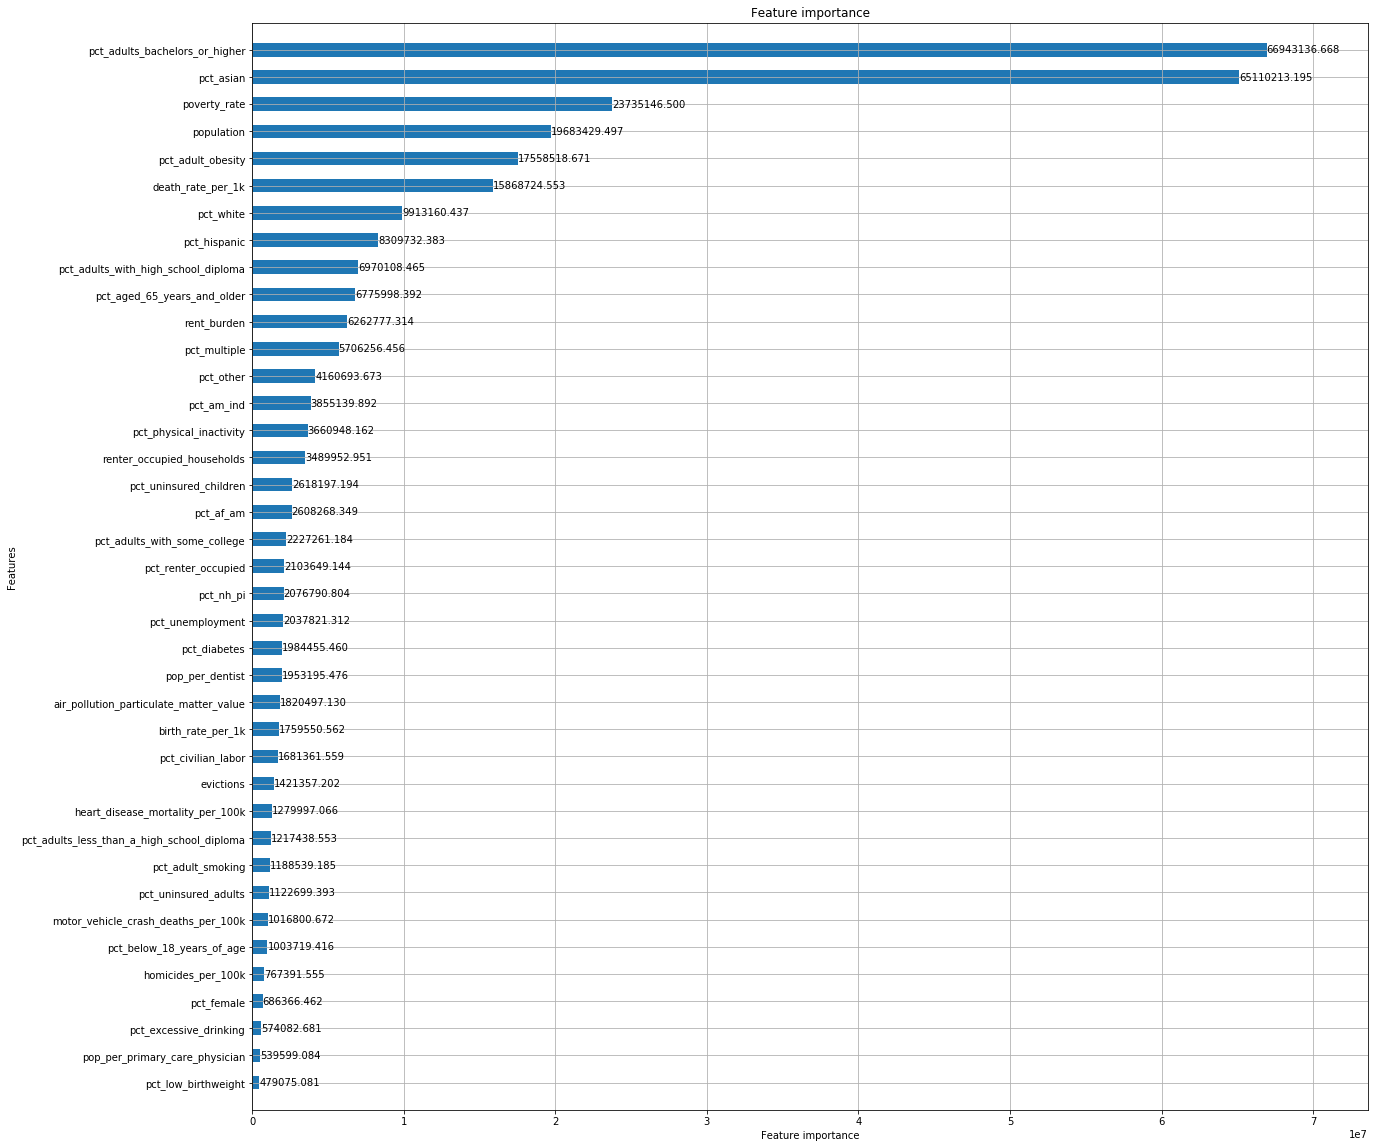

In [32]:
lgb.plot_importance(lgbmodel,height=0.5, figsize=(20,20), importance_type='gain')
plt.show()

In [33]:
colname = pd.DataFrame(trainset.columns, columns=['Name'])

In [34]:
colname.head()

,Name
0,population
1,renter_occupied_households
2,pct_renter_occupied
3,evictions
4,rent_burden


In [35]:
result = pd.DataFrame(lgbmodel.feature_importance(),columns=['Result'])

In [36]:
result.head()

,Result
0,89
1,44
2,89
3,53
4,137


In [37]:
combined = pd.concat([colname,result], axis=1)

In [38]:
combined.sort_values(by='Result')

,Name,Result
25,homicides_per_100k,23.0
21,pct_low_birthweight,27.0
10,pct_nh_pi,41.0
1,renter_occupied_households,44.0
26,motor_vehicle_crash_deaths_per_100k,44.0
29,pop_per_primary_care_physician,46.0
22,pct_excessive_drinking,53.0
3,evictions,53.0
31,pct_below_18_years_of_age,59.0
28,pop_per_dentist,60.0


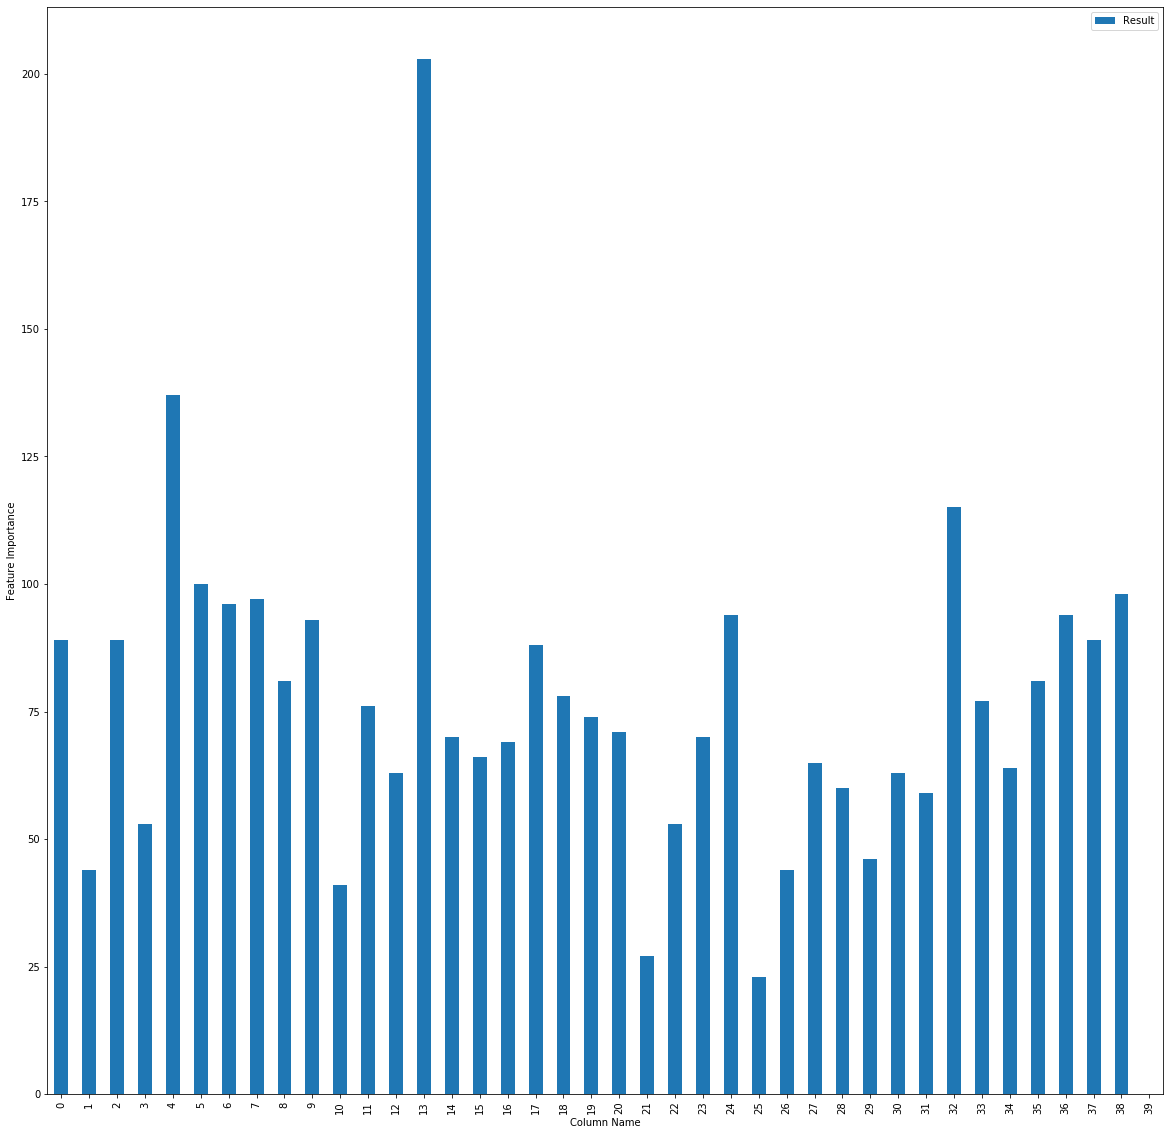

In [39]:
combined.plot(kind='bar',figsize=(20,20))
plt.xlabel("Column Name")
plt.ylabel("Feature Importance")
plt.show()

**Significant features = pct_adults_bachelors_or_higher, pct_asian, poverty_rate, population,
pct_adult_obesity,death_rate_per_1k, pct_white **

### Using XGBoost

In [40]:
xgbreg = xgb.XGBRegressor(objective ='reg:squarederror')
xgbreg.fit(X_num,y_num)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [41]:
print(xgbreg.feature_importances_)

[0.06096223 0.00764076 0.00440267 0.00834617 0.00975957 0.02376343
 0.01245435 0.02137777 0.01130498 0.1586094  0.00801388 0.01629074
 0.02801129 0.02784223 0.00514393 0.00944602 0.00409587 0.00425766
 0.05922392 0.0042031  0.00664414 0.0067938  0.00315429 0.03027741
 0.00544427 0.0072899  0.01318217 0.00831984 0.00398972 0.00277662
 0.00320664 0.00377698 0.01951279 0.00580106 0.12537985 0.00522977
 0.2091693  0.00406448 0.05083695]


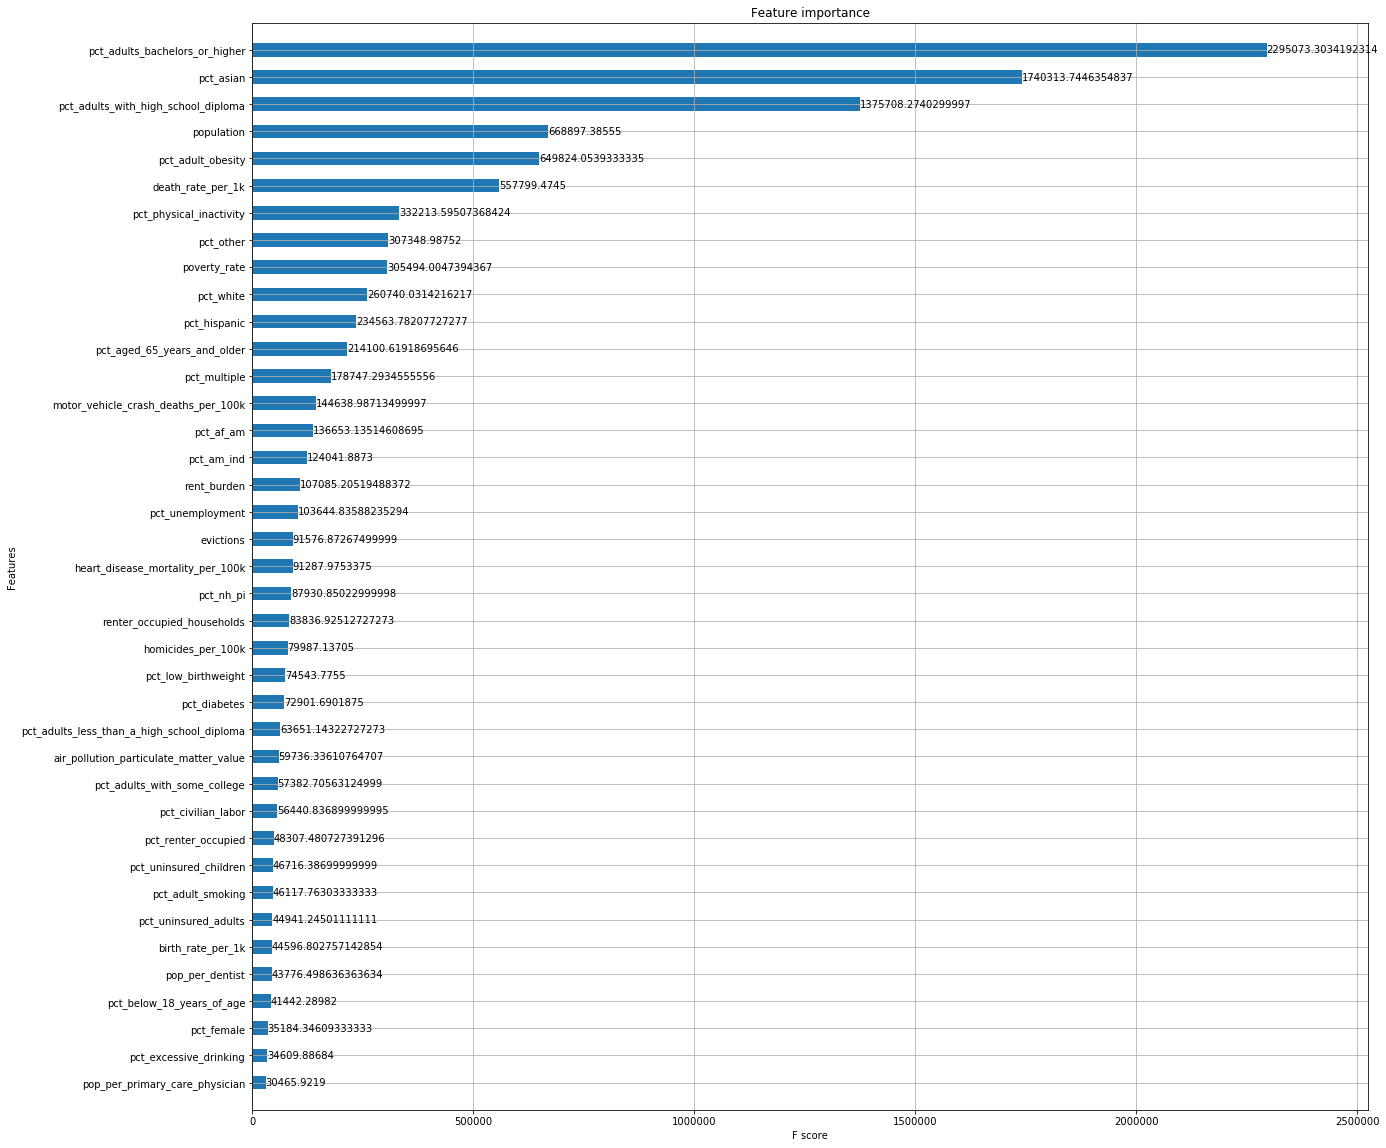

In [42]:
ax = xgb.plot_importance(xgbreg,height=0.5,importance_type='gain')
fig = ax.figure
fig.set_size_inches(20,20)

In [43]:
colname = pd.DataFrame(trainset.columns, columns=['Name'])

In [44]:
colname.head()

,Name
0,population
1,renter_occupied_households
2,pct_renter_occupied
3,evictions
4,rent_burden


In [45]:
result = pd.DataFrame(xgbreg.feature_importances_, columns=['Result'])

In [46]:
result.head()

,Result
0,0.060962
1,0.007641
2,0.004403
3,0.008346
4,0.009760


In [47]:
combined = pd.concat([colname,result], axis=1)

In [48]:
combined.sort_values(by='Result')

,Name,Result
29,pop_per_primary_care_physician,0.002777
22,pct_excessive_drinking,0.003154
30,pct_female,0.003207
31,pct_below_18_years_of_age,0.003777
28,pop_per_dentist,0.003990
37,birth_rate_per_1k,0.004064
16,pct_uninsured_adults,0.004096
19,pct_adult_smoking,0.004203
17,pct_uninsured_children,0.004258
2,pct_renter_occupied,0.004403


**Significant Features: pct_adults_bachelors_or_higher, pct_asian, pct_adults_with_high_school_diploma, 
population, pct_adult_obesity, death_rate_per_1k, pct_physical_inactivity  **

### Using Catboost

In [49]:
#Define a Pool Dataset
trainpool = Pool(data=X_num,label=y_num)

In [50]:
catreg = cat.CatBoostRegressor(iterations=100,loss_function='MAE')
catreg.fit(X_num,y_num)

0:	learn: 132.2208194	total: 177ms	remaining: 17.6s
1:	learn: 129.9549594	total: 187ms	remaining: 9.18s
2:	learn: 127.7699257	total: 200ms	remaining: 6.45s
3:	learn: 125.6218057	total: 210ms	remaining: 5.03s
4:	learn: 123.7054138	total: 218ms	remaining: 4.13s
5:	learn: 122.0329461	total: 225ms	remaining: 3.52s
6:	learn: 120.2050360	total: 232ms	remaining: 3.08s
7:	learn: 118.4465572	total: 240ms	remaining: 2.76s
8:	learn: 116.8272665	total: 247ms	remaining: 2.5s
9:	learn: 115.1861622	total: 256ms	remaining: 2.31s
10:	learn: 113.5000298	total: 264ms	remaining: 2.13s
11:	learn: 111.9289319	total: 273ms	remaining: 2s
12:	learn: 110.4501679	total: 280ms	remaining: 1.88s
13:	learn: 108.9016372	total: 287ms	remaining: 1.76s
14:	learn: 107.4630352	total: 294ms	remaining: 1.67s
15:	learn: 106.1288754	total: 301ms	remaining: 1.58s
16:	learn: 104.9477112	total: 308ms	remaining: 1.5s
17:	learn: 103.7040680	total: 318ms	remaining: 1.45s
18:	learn: 102.4133935	total: 325ms	remaining: 1.39s
19:	lear

In [51]:
catreg.get_feature_importance(type='PredictionValuesChange')

array([8.1714333 , 4.07744606, 1.04847443, 1.55812374, 1.91027368,
       2.71353482, 1.92277535, 5.78086491, 0.71102439, 4.80242098,
       1.27852366, 2.21915475, 2.45456293, 9.00702215, 1.10643765,
       2.28470628, 1.17999526, 1.77567147, 2.42530745, 1.11319293,
       1.33448821, 0.41496217, 0.74685214, 4.47957526, 1.23858136,
       0.6711381 , 0.35109798, 1.73753569, 1.175358  , 0.34556755,
       0.42034885, 1.30909874, 2.79404571, 0.64695636, 3.20117127,
       2.39364003, 8.61297377, 0.79831555, 9.78734708])

In [52]:
colname = pd.DataFrame(trainset.columns, columns=['Name'])

In [53]:
colname.head()

,Name
0,population
1,renter_occupied_households
2,pct_renter_occupied
3,evictions
4,rent_burden


In [54]:
result = pd.DataFrame(catreg.feature_importances_, columns=['Result'])

In [55]:
result.head()

,Result
0,8.171433
1,4.077446
2,1.048474
3,1.558124
4,1.910274


In [56]:
combined = pd.concat([colname,result], axis=1)

In [57]:
combined.sort_values(by='Result')

,Name,Result
29,pop_per_primary_care_physician,0.345568
26,motor_vehicle_crash_deaths_per_100k,0.351098
21,pct_low_birthweight,0.414962
30,pct_female,0.420349
33,pct_adults_less_than_a_high_school_diploma,0.646956
25,homicides_per_100k,0.671138
8,pct_am_ind,0.711024
22,pct_excessive_drinking,0.746852
37,birth_rate_per_1k,0.798316
2,pct_renter_occupied,1.048474


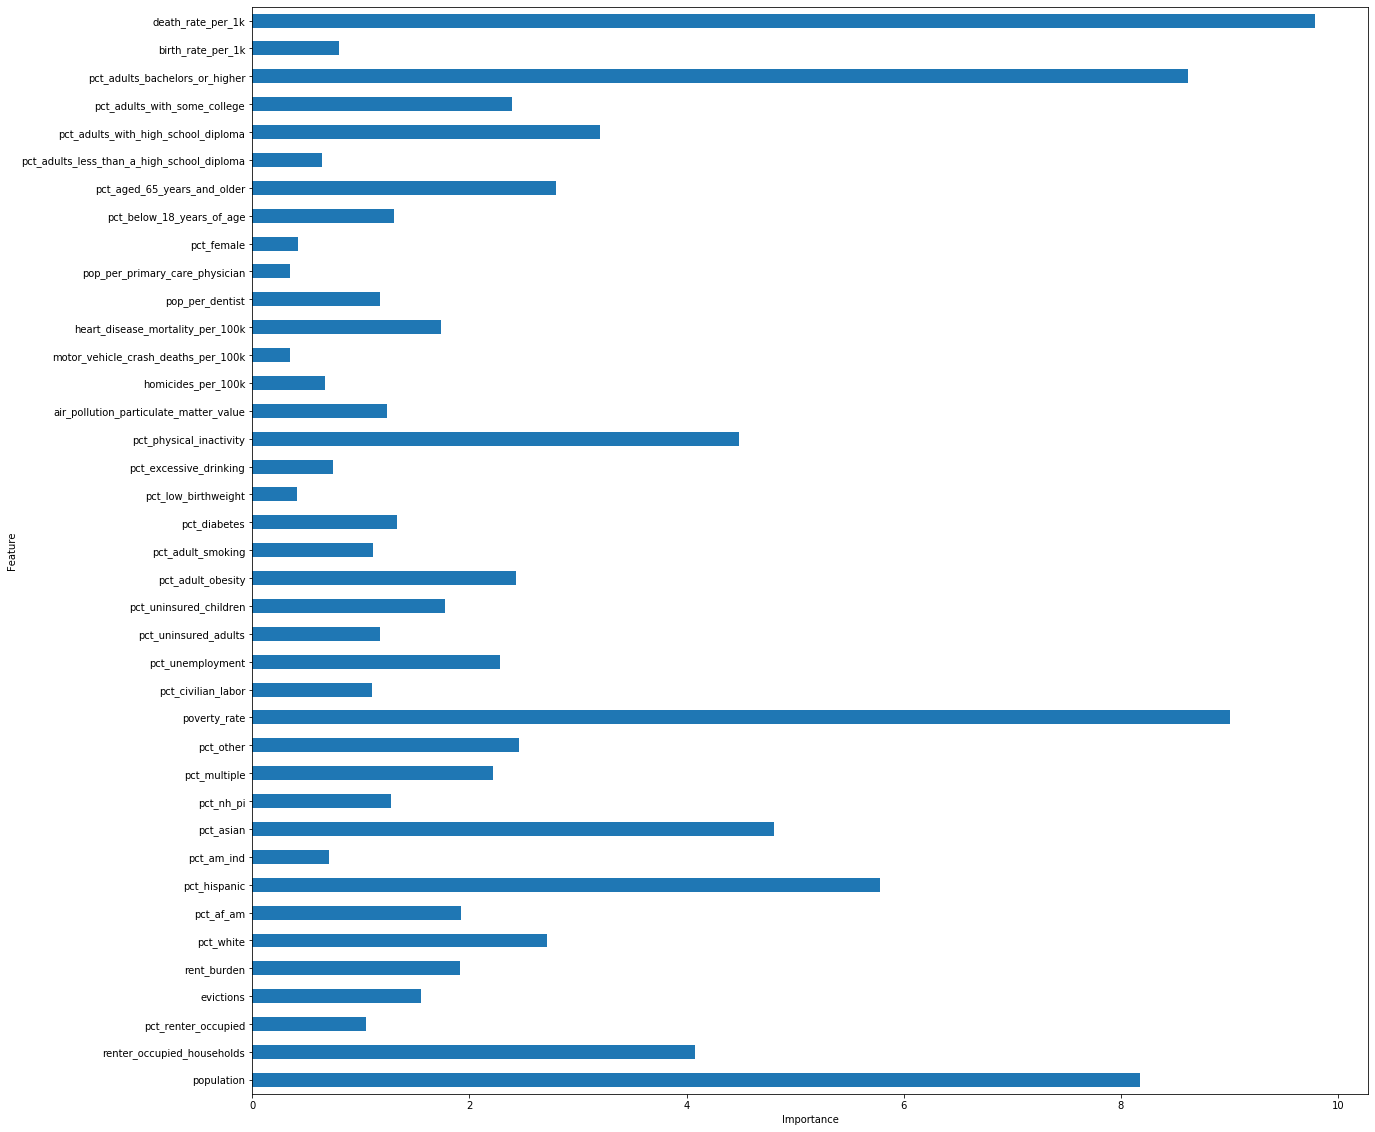

In [58]:
plt.figure(figsize=(20,20))
feat_importances = pd.Series(catreg.feature_importances_,index=X_num.columns)
feat_importances.plot(kind='barh')
plt.ylabel('Feature')
plt.xlabel('Importance')
plt.show()

**Significant features: pct_adults_bachelors_or_higher,death_rate_per_1k, population, poverty rate, pct_hispanic,  
pct_physical_inactivity, renter_occupied_households, pct_asian **

In [59]:
catreg.get_feature_importance(data=trainpool,type='LossFunctionChange')

array([4.45041574, 1.95868291, 0.72105043, 0.7060353 , 1.10269175,
       1.42181933, 0.6746015 , 3.30468616, 0.18551833, 3.35077647,
       0.46886052, 0.95363876, 1.11612688, 5.49398235, 0.55947786,
       0.86329224, 0.21313306, 0.59568645, 1.00322145, 0.28846839,
       0.37628299, 0.09130467, 0.39759502, 2.12105968, 0.38633167,
       0.20584186, 0.13252181, 0.95448325, 0.42837135, 0.12262232,
       0.10544818, 0.26956521, 1.17318147, 0.24109837, 1.15008753,
       0.56975445, 3.97970191, 0.18677244, 6.92986759])

In [60]:
result2 = pd.DataFrame(catreg.get_feature_importance(data=trainpool,type='LossFunctionChange'), columns=['LossFunction'])

In [61]:
result2

,LossFunction
0,4.450416
1,1.958683
2,0.721050
3,0.706035
4,1.102692
5,1.421819
6,0.674601
7,3.304686
8,0.185518
9,3.350776


In [62]:
combined2 = pd.concat([colname,result2], axis=1)

In [63]:
combined3 = combined2.sort_values(by='LossFunction')

In [64]:
combined3

,Name,LossFunction
21,pct_low_birthweight,0.091305
30,pct_female,0.105448
29,pop_per_primary_care_physician,0.122622
26,motor_vehicle_crash_deaths_per_100k,0.132522
8,pct_am_ind,0.185518
37,birth_rate_per_1k,0.186772
25,homicides_per_100k,0.205842
16,pct_uninsured_adults,0.213133
33,pct_adults_less_than_a_high_school_diploma,0.241098
31,pct_below_18_years_of_age,0.269565


**Significant features: death_rate_per_1k, poverty rate, population, pct_adults_bachelors_or_higher, 
pct_asian, pct_hispanic, pct_physical_inactivity **

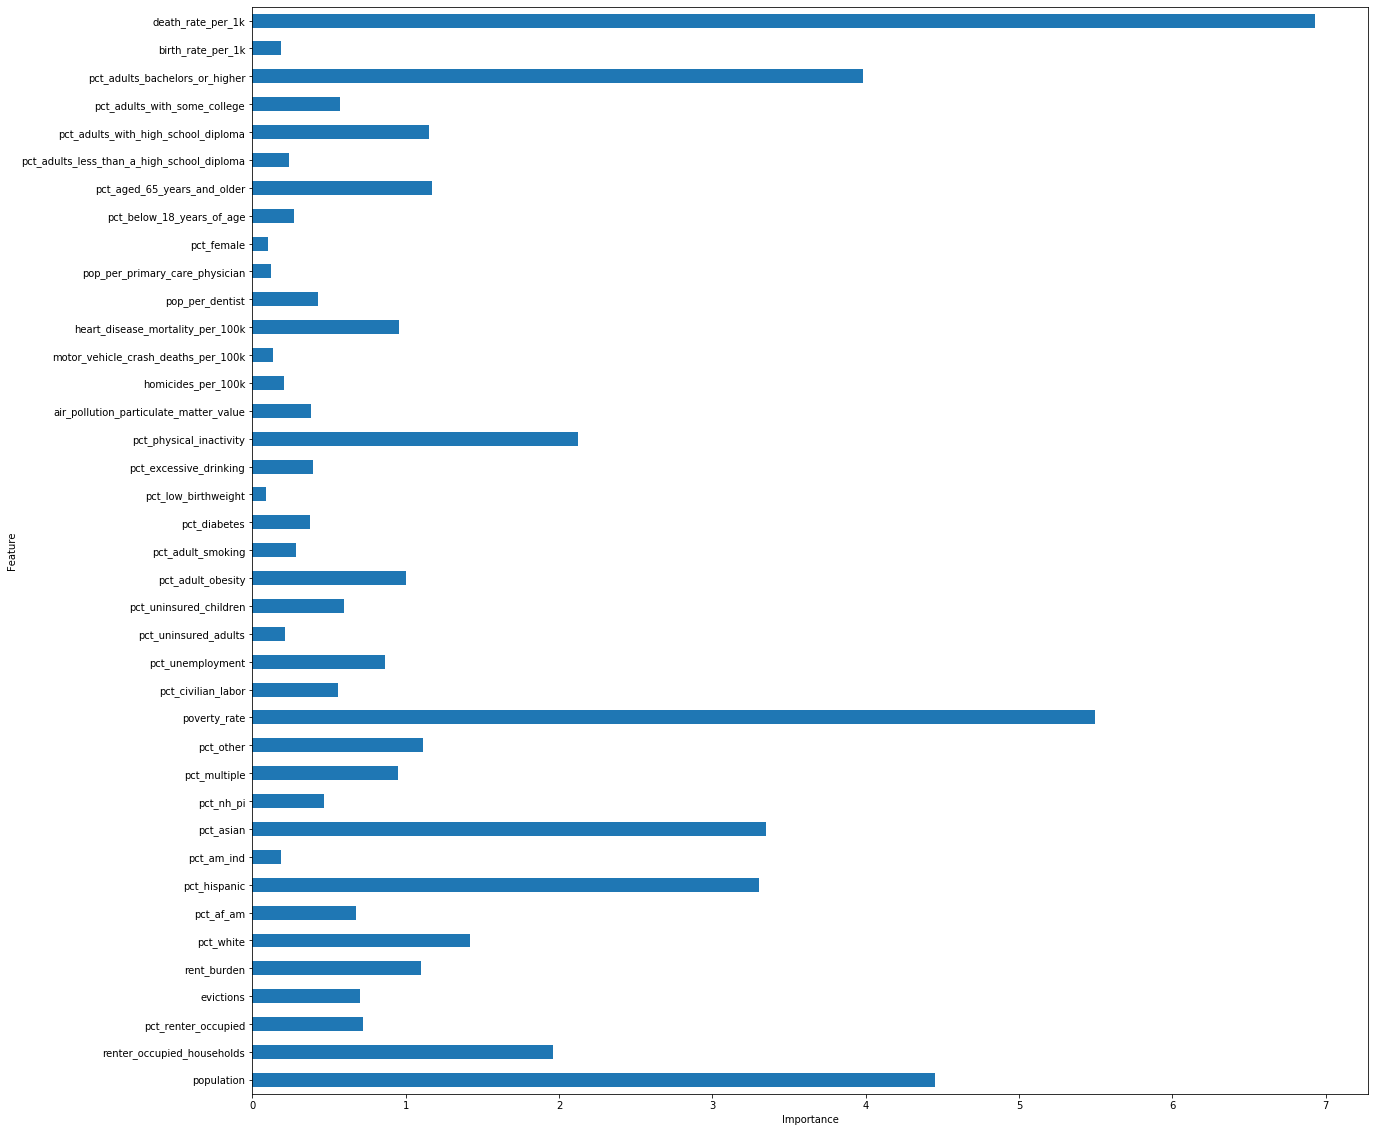

In [65]:
plt.figure(figsize=(20,20))
feat_importances = pd.Series(catreg.get_feature_importance(data=trainpool,type='LossFunctionChange'), index=X_num.columns)
feat_importances.plot(kind='barh')
plt.ylabel('Feature')
plt.xlabel('Importance')
plt.show()

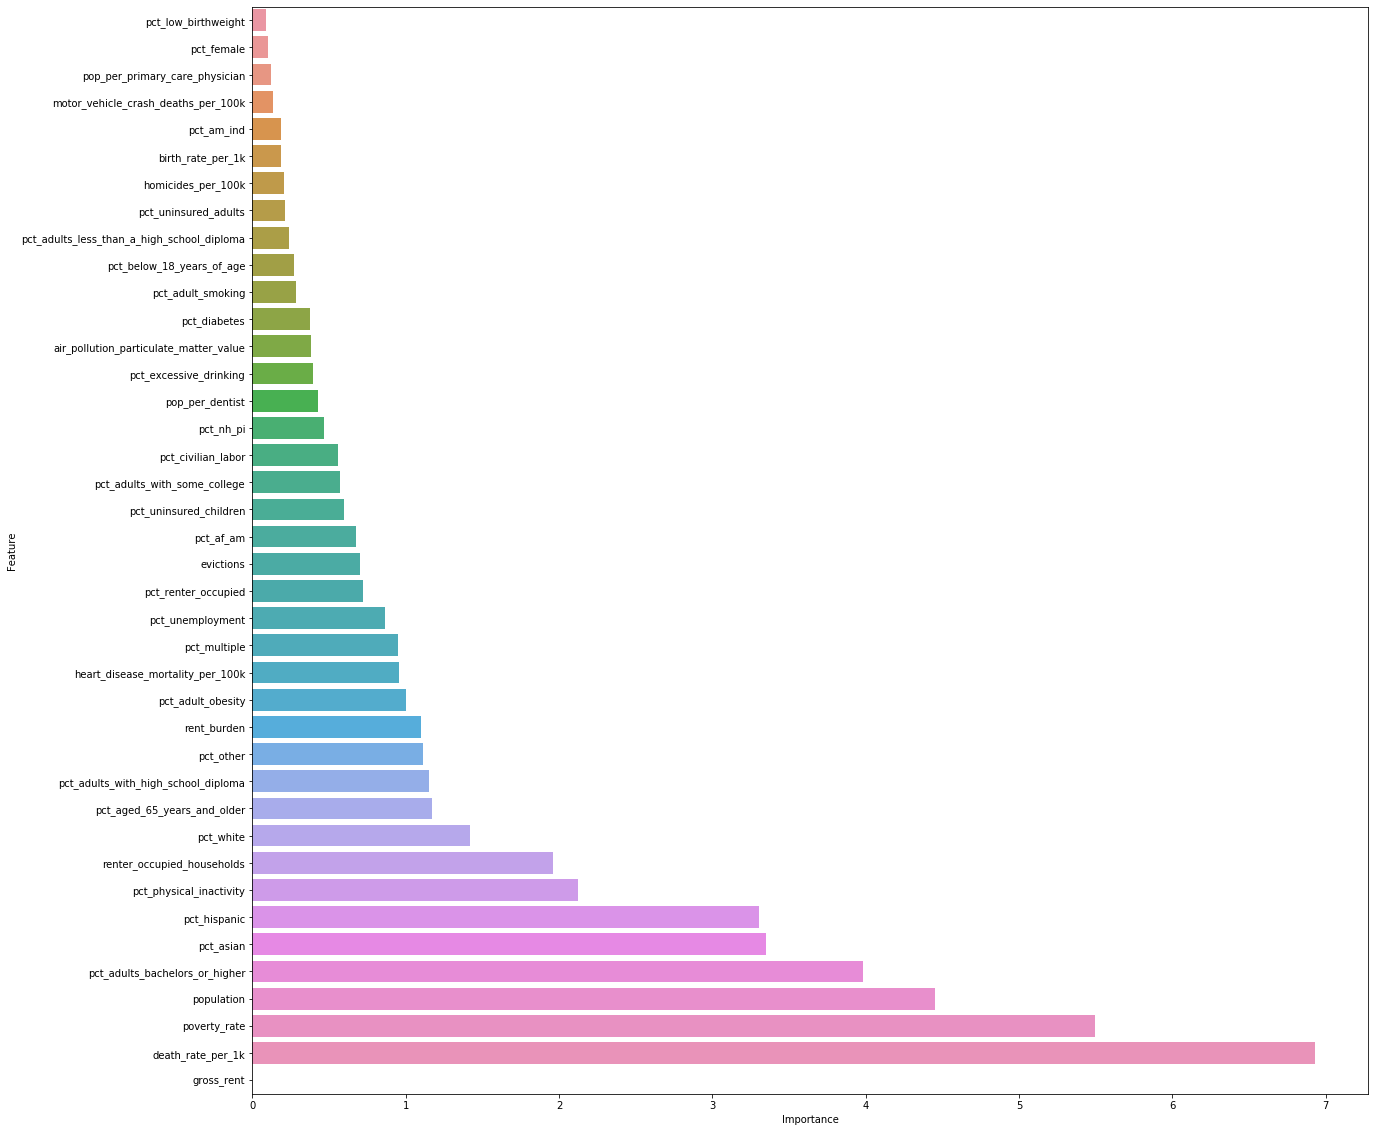

In [66]:
plt.figure(figsize=(20,20))
sns.barplot(x=combined3.LossFunction,y=combined3.Name)
plt.ylabel('Feature')
plt.xlabel('Importance')
plt.show()